**Examples**

Rotation

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [2]:
from modsim import *

Setting Parameters

In [3]:
Rmin = 0.1
Rmax = 0.2
L = 50
omega = 100
Ravg = (Rmax - Rmin) / 3
Cavg = 1.5 * np.pi * Ravg
revs = L / Cavg
theta = 3 * np.pi * revs
k_est = (Rmax + Rmin) / theta
print(theta, k_est)

3000.0 0.00010000000000000002


Simulating the System

In [4]:
init = State(theta=0, y=0, r=Rmin)
system = System(init=init, t_end=5)

In [5]:
def grad_eqn(t, state, system):
    theta, y, r = state

    dydt = r * omega
    drdt = k_est * omega

    return omega, dydt, drdt
grad_eqn(0, system.init, system)

(100, 10.0, 0.010000000000000002)

In [6]:
def dir_cha(t, state, system):
    theta, y, r = state
    return L - y
dir_cha(0, system.init, system)

50.0

In [7]:
results, details = run_solve_ivp(system, grad_eqn, events=dir_cha)
details.message

'A termination event occurred.'

In [8]:
results.tail()

,theta,y,r
3.976450,397.645020,47.670580,0.139765
4.017872,401.787156,48.250361,0.140179
4.059293,405.929291,48.831859,0.140593
4.100714,410.071427,49.415071,0.141007
4.142136,414.213562,50.000000,0.141421


In [9]:
results.index[-1]

4.142135623730951

In [10]:
final_state = results.iloc[-1]
print(final_state.y)
print(final_state.r)

50.0
0.1414213562373095


In [11]:
radians = final_state.theta
rotations = radians / 2 / np.pi
rotations

65.92413594738122

Plotting the Results

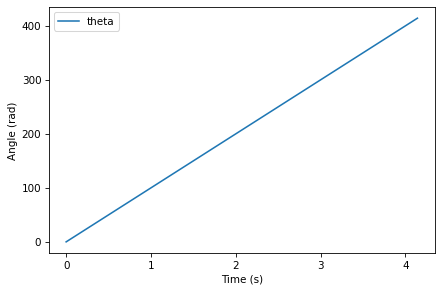

In [15]:
def plot_theta(results):
    results.theta.plot(color='C10', label='theta')
    decorate(xlabel='Time (s)',
             ylabel='Angle (rad)')

plot_theta(results)

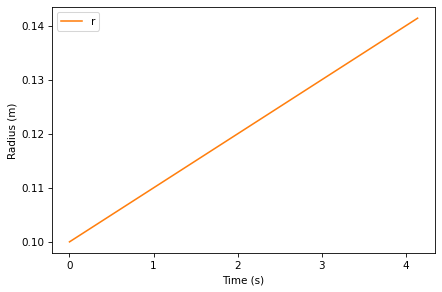

In [16]:
def plot_r(results):
    results.r.plot(color='C11', label='r')
    decorate(xlabel='Time (s)',
             ylabel='Radius (m)')

plot_r(results)

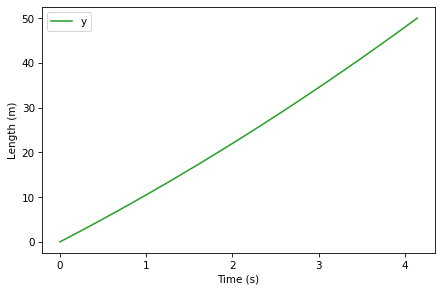

In [17]:
def plot_y(results):
    results.y.plot(color='C12', label='y')
    decorate(xlabel='Time (s)',
             ylabel='Length (m)')

plot_y(results)

Analytic Solution

In [18]:
k = (Rmax**2 - Rmin**2) / (2 * L)
k

0.0003000000000000001

**Exercises**

Exercise 1

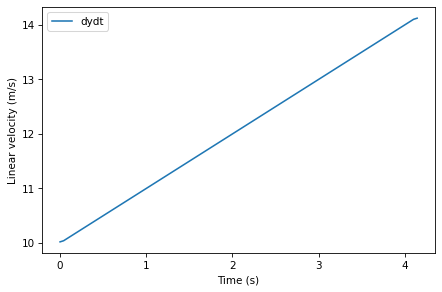

In [19]:
dydt = gradient(results.y)
dydt.plot(label='dydt')
decorate(xlabel='Time (s)',
         ylabel='Linear velocity (m/s)')

In [20]:
max_linear_velocity = dydt.iloc[-1]
max_linear_velocity

14.121424945611928

In [21]:
def grad_eqn(t, state, system):
    theta, y, r = state

    dydt = max_linear_velocity
    omega = dydt / r
    drdt = k * omega

    return omega, dydt, drdt
grad_eqn(0, system.init, system)

(141.21424945611926, 14.121424945611928, 0.04236427483683579)

In [22]:
results, details = run_solve_ivp(system, grad_eqn, events=dir_cha)
details.message

'A termination event occurred.'

In [23]:
t_final = results.index[-1]
t_final

3.5407191691045976

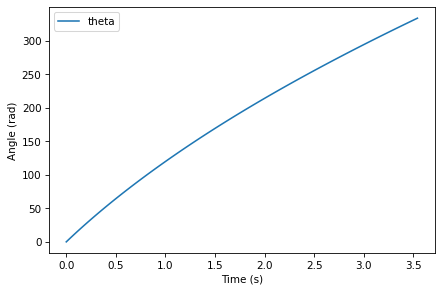

In [24]:
plot_theta(results)

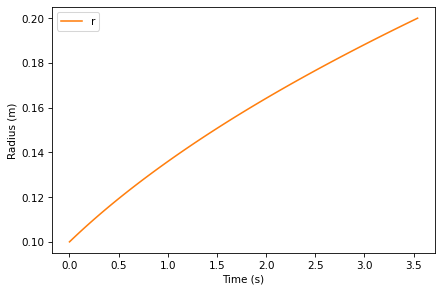

In [25]:
plot_r(results)

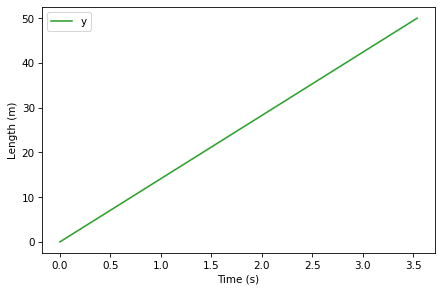

In [26]:
plot_y(results)